# Aquire dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emnist

import torch 
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader
import torch.optim as optim

In [2]:
def get_data():
    X, Y = emnist.extract_training_samples('letters')
    X_test, Y_test = emnist.extract_test_samples('letters')

    return X, Y- 1, X_test, Y_test - 1

In [3]:
X, m_Y, X_test, m_Y_test = get_data()

In [4]:
X.shape

(124800, 28, 28)

In [5]:
X = torch.tensor(np.array(X), dtype=torch.float)
X_test = torch.tensor(np.array(X_test), dtype=torch.float)

In [6]:
m = X.shape[0]

In [7]:
Y = torch.zeros(m,26, dtype = torch.float)
Y_test = torch.zeros(X_test.shape[0],26, dtype = torch.long)
for i in range(0,m):
    Y[i, m_Y[i]] = 1
for i in range(0,X_test.shape[0]):
    Y_test[i, m_Y_test[i]] = 1

In [8]:
train_dataset = TensorDataset(X, Y)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TensorDataset(X_test, Y_test)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [9]:
def show_img(i):
    plt.imshow(i)

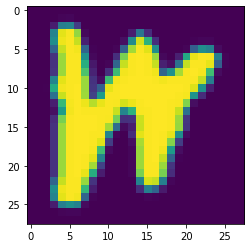

In [10]:
show_img(X[0])

In [11]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28,512)
        self.fc2 = nn.Linear(512,120)
        self.fc3 = nn.Linear(120,26)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=0)
        return x

model = Net()

In [12]:
#constants 

learning_rate = 0.001
batch_size = 64
epochs = 10

In [13]:
loss_fn = nn.CrossEntropyLoss()

In [14]:
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

In [15]:
model(X[0].flatten())

tensor([2.5638e-15, 1.1502e-09, 5.2334e-13, 9.9998e-01, 1.5469e-14, 1.0977e-18,
        3.1923e-14, 4.7668e-17, 2.5874e-12, 4.5282e-22, 1.8749e-06, 9.9583e-21,
        5.8076e-15, 4.6915e-14, 2.0719e-05, 2.7950e-15, 3.1957e-24, 1.9050e-16,
        2.4506e-09, 1.5559e-17, 1.0545e-15, 1.1015e-11, 3.3628e-09, 2.4418e-17,
        1.4636e-12, 3.7262e-16], grad_fn=<SoftmaxBackward0>)

In [16]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    size = len(train_dataloader.dataset)
    for batch, (x, y) in enumerate(train_dataloader):
        optimizer.zero_grad()
        pred = model(x.flatten(1))
        loss = loss_fn(pred, y)
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(x)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
print('training finished')

Epoch 1
-------------------------------
loss: 3.275935  [    0/124800]
loss: 3.178238  [ 6400/124800]
loss: 3.112204  [12800/124800]
loss: 3.034708  [19200/124800]
loss: 3.021504  [25600/124800]
loss: 3.069655  [32000/124800]
loss: 2.987993  [38400/124800]
loss: 3.008710  [44800/124800]
loss: 3.038892  [51200/124800]
loss: 3.013395  [57600/124800]
loss: 3.023335  [64000/124800]
loss: 2.985099  [70400/124800]
loss: 3.026540  [76800/124800]
loss: 3.017977  [83200/124800]
loss: 3.020319  [89600/124800]
loss: 2.994710  [96000/124800]
loss: 2.916852  [102400/124800]
loss: 3.011504  [108800/124800]
loss: 3.001291  [115200/124800]
loss: 2.968252  [121600/124800]
Epoch 2
-------------------------------
loss: 2.979957  [    0/124800]
loss: 2.991023  [ 6400/124800]
loss: 3.032188  [12800/124800]
loss: 2.929416  [19200/124800]
loss: 2.928414  [25600/124800]
loss: 2.986498  [32000/124800]
loss: 2.969741  [38400/124800]
loss: 2.971541  [44800/124800]
loss: 2.972030  [51200/124800]
loss: 2.990364  [

In [17]:
torch.argmax(model(X_test[5].flatten())).item()

0

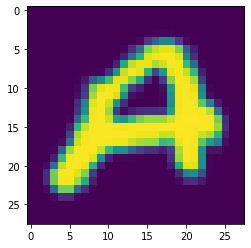

In [18]:
show_img(X_test[5])

In [43]:
count = 0

m_test = X_test.shape[0]

with torch.no_grad():
    for (x, y) in test_dataloader:
        count += sum(sum(model(x.flatten(1)) == y)).item()

In [44]:
count

1508

In [45]:
count/m_test * 100

7.249999999999999